In [1]:
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate, matrix_transform
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage import color, io
from skimage.util import img_as_float
import numpy as np


## Geometric transformations on images

The first topic is how to apply geometric transformations on images. 

Let us start by defining a utility function, that can show two images side-by-side:

In [2]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

## Image rotation

One of the most useful and simple geometric transformation is rotation, where an image is rotated around a point. 

We start by some experiments on the image called **NusaPenida.png**. It can be found in the [exercise material](https://github.com/RasmusRPaulsen/DTUImageAnalysis/tree/main/exercises/Ex7-GeometricTransformationsAndRegistration/data)

### Exercise 1

Read the **NusaPenida.png** image and call it **im_org**. It can be rotated by:

``` python
# angle in degrees - counter clockwise
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")
```

Notice, that in this function, the angle should be given in degrees.

By default, the image is rotated around the center of the image. This can be changed by manually specifying the point that the image should be rotated around (here (0, 0)):

``` python
rot_center = [0, 0]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)
```

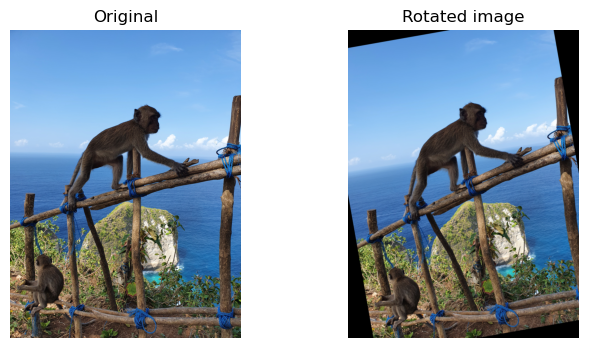

In [3]:
im_org = io.imread('data/NusaPenida.png')
# angle in degrees - counter clockwise
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")

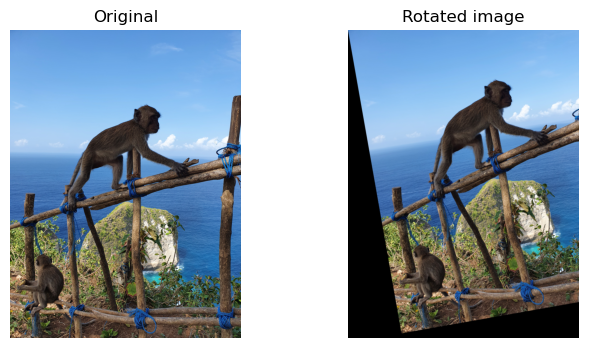

In [4]:
rot_center = [0, 0]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)
show_comparison(im_org, rotated_img, "Rotated image")

### Exercise 2

Experiment with different center points and notice the results.

As seen, there are areas of the rotated image that is filled with a background value. It can be controlled how this background filling shall behave.

Here the background filling mode is set to **reflect**

``` python
rotated_img = rotate(im_org, rotation_angle, mode="reflect")
```


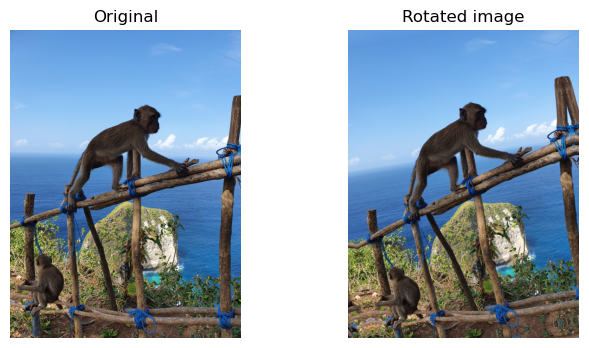

In [5]:
rotated_img = rotate(im_org, rotation_angle, mode="reflect")
show_comparison(im_org, rotated_img, "Rotated image")

### Exercise 3

Try the rotation with background filling mode **reflect** and **wrap** and notice the results and differences.

It is also possible to define a constant fill value. Currently, sci-kit image only supports a single value (not RGB). 

In [6]:
rotation_angle = 30
rotated_img = rotate(im_org, rotation_angle, mode="wrap", cval=1)
show_comparison(im_org, rotated_img, "Rotated image")

### Exercise 4
Try to use:

``` python
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=1)
```

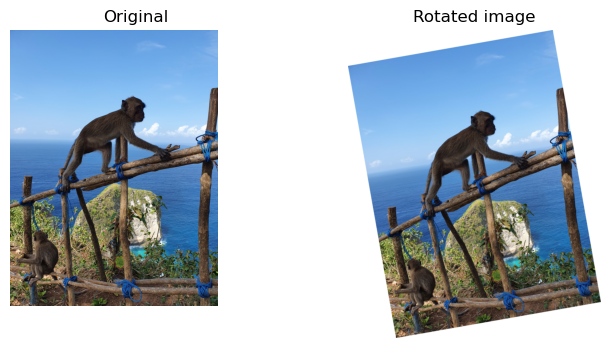

In [7]:
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=1)
show_comparison(im_org, rotated_img, "Rotated image")

with different values of `cval` and notice the outcomes.

By default, the rotated output image has the same size as the input image and therefore some parts of the rotated image are cropped away. It is possible to automatically adjust the output size, so the rotated image fits into the resized image.

### Exercise 5

Test the use of automatic resizing:

``` python
rotated_img = rotate(im_org, rotation_angle, resize=True)
```

also combine resizing with different background filling modes.

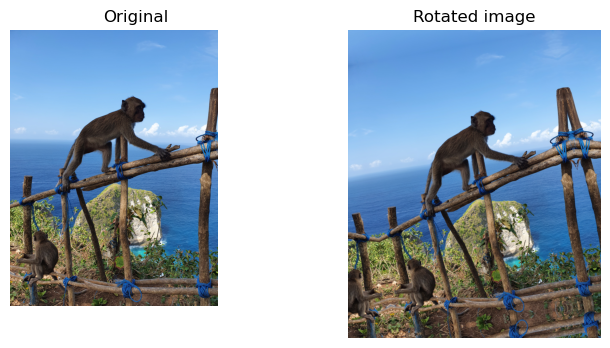

In [8]:
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="reflect")
show_comparison(im_org, rotated_img, "Rotated image")

## Euclidean image transformation

An alternative way of doing geometric image transformations is to first construct the transformation and then apply it to the image. We will start by the **Euclidean** image transformation that consists of a rotation and a translation. It is also called a *rigid body transformation*.

### Exercise 6

Start by defining the transformation:

``` python
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)
```

it can be seen in the print statement that the transformation consists of a *3 x 3 matrix*. The matrix is used to transform points using **homogenous coordinates**. Notice that the angle is defined in radians in this function.


In [9]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


### Exercise 7

The computed transform can be applied to an image using the `warp` function:
``` python
transformed_img = warp(im_org, tform)
```

Try it.


**Note:** The `warp` function actually does an *inverse* transformation of the image, since it uses the transform to find the pixels values in the input image that should be placed in the output image.

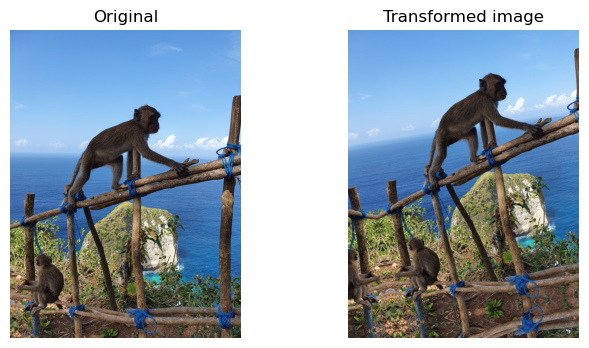

In [10]:
transformed_img = warp(im_org, tform, mode = 'symmetric')
show_comparison(im_org, transformed_img, "Transformed image")

## Inverse transformation

It is possible to get the inverse of a computed transform by using `tform.inverse`. An image can then be transformed using the invers transform by:

``` python
transformed_img = warp(im_org, tform.inverse)
```

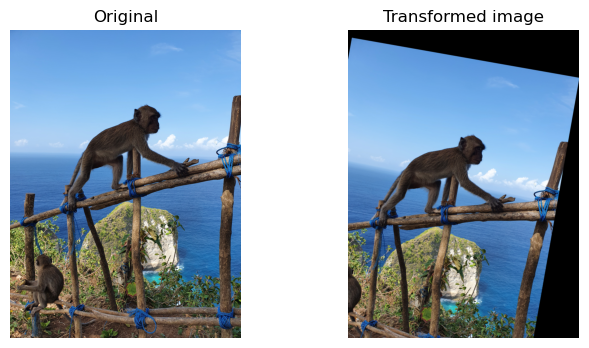

In [11]:
transformed_img = warp(im_org, tform.inverse)
show_comparison(im_org, transformed_img, "Transformed image")

### Exercise 8

Construct a Euclidean transformation with only rotation. Test the transformation and the invers transformation and notice the effect.




In [12]:
trans = [10, 20]
tform = EuclideanTransform(translation=trans)
print(tform.params)

[[ 1. -0. 10.]
 [ 0.  1. 20.]
 [ 0.  0.  1.]]


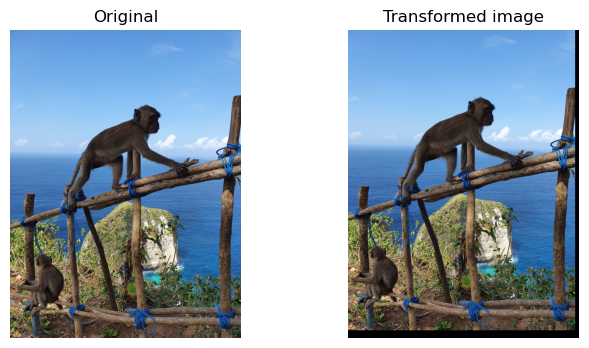

In [13]:
transformed_img = warp(im_org, tform, mode = 'constant')
show_comparison(im_org, transformed_img, "Transformed image")

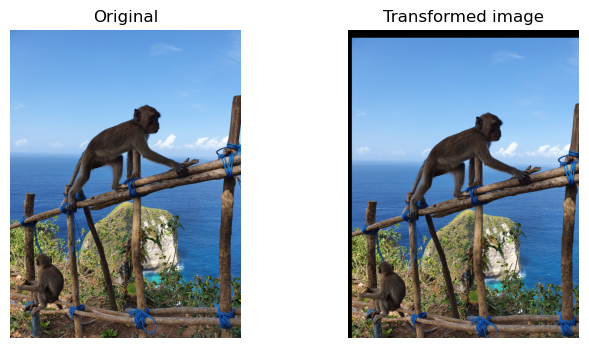

In [14]:
transformed_img = warp(im_org, tform.inverse)
show_comparison(im_org, transformed_img, "Transformed image")

## Similarity transform of image

The `SimilarityTransform` computes a transformation consisting of a translation, rotation and a scaling. 

### Exercise 9

Define a `SimilarityTransform` with an angle of $15^o$, a translation of (40, 30) and a scaling of 0.6 and test it on the image.

In [15]:
rotation_angle = 15.0 * math.pi / 180.
trans = [40, 30]
scale = 0.6
tform = SimilarityTransform(rotation=rotation_angle, translation=trans, scale=scale)

tform.params

array([[ 0.5795555 , -0.15529143, 40.        ],
       [ 0.15529143,  0.5795555 , 30.        ],
       [ 0.        ,  0.        ,  1.        ]])

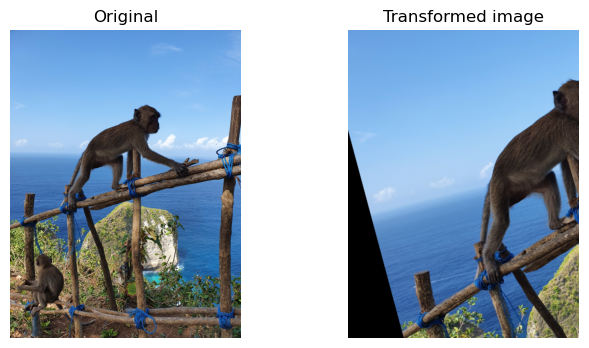

In [16]:
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Transformed image")

## The swirl image transformation

The **swirl** image transform is a non-linear transform that can create interesting visual results on images.

### Exercise 10

Try the swirl transformation:

``` python
str = 10
rad = 300
swirl_img = swirl(im_org, strength=str, radius=rad)
```

it is also possible to change the center of the swirl:

``` python
str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)
```

try with different centers and notice the results.

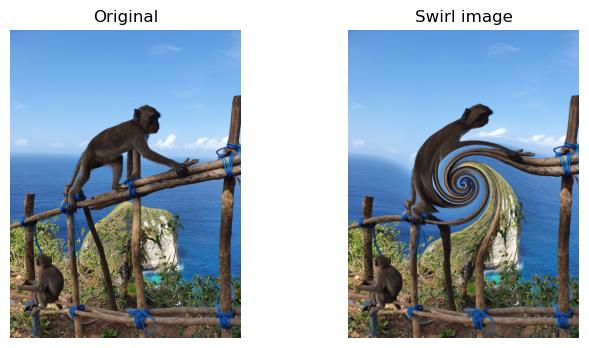

In [17]:
str = 10
rad = 300
swirl_img = swirl(im_org, strength=str, radius=rad)
show_comparison(im_org, swirl_img, "Swirl image")

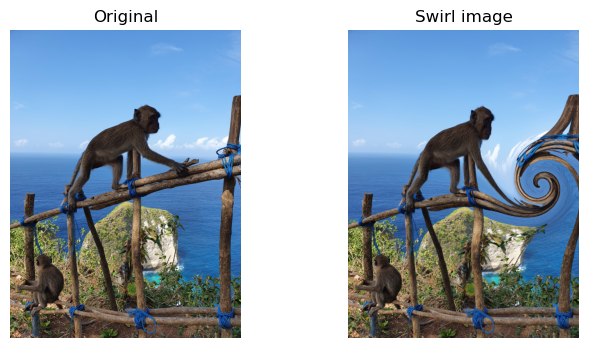

In [18]:
str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)
show_comparison(im_org, swirl_img, "Swirl image")

# Landmark based registration

The goal of landmark based registration is to align two images using a set of landmarks placed in both images. The landmarks need to have *correspondence* meaning that the landmarks should be placed on the same anatomical spot in the two images.

There are two photos of hands: **Hand1.jpg** and **Hand2.jpg** and the goal is to transform **Hand1** so it fits on top of **Hand2**. In this exercise we call Hand1 one for the *source* (src) and Hand2 for the *destination* (dst).

### Exercise 11

Start by reading the two images into *src_img* and *dst_img*. Visualize their overlap by:

``` python
blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()
```

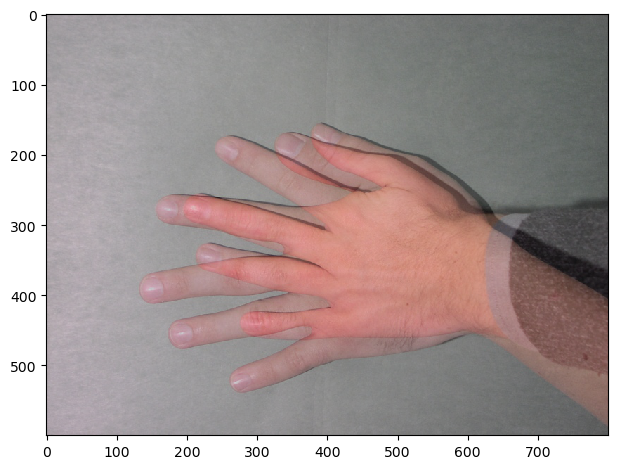

In [19]:
src_img = io.imread('data/Hand1.jpg')
dst_img = io.imread('data/Hand2.jpg')

blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()


## Manual landmark annotation

We will manually placed landmarks on the two images to align the them.

### Exercise 12
We have manually placed a set of landmarks on the source image. They can be visualized by:

``` python
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()
```

In [20]:
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])
plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()


### Exercise 13

You should now place the same landmarks on the destination image. 

In imshow you can see the pixel coordinates of the cursor:

![imshow image coordinates](figs/imshow_coordinates.png)

Use this to find the coordinates of the sought landmarks and put them into a `dst` variable.

Plot the landmarks to verify they are correct:

``` python
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()
```

In [21]:
plt.imshow(dst_img)
plt.show()

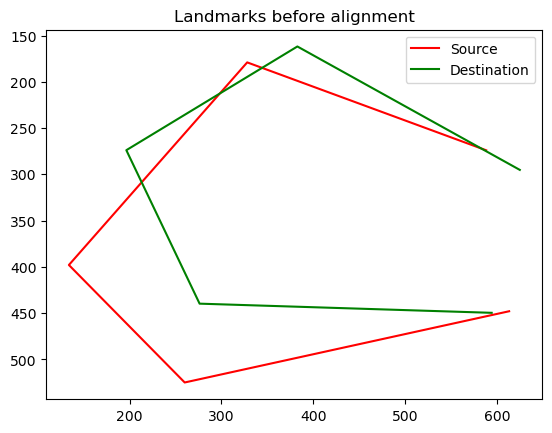

In [22]:
dst = np.array([[624.6, 295.2], [382.6, 161.8], [196.5, 273.9], [276.2, 439.8], [594.0, 449.7]])

fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

To calculate how well two sets of landmarks are aligned, we can compute the *objective function*:

$$ F = \sum_{i=1}^N \|a_i - b_i\|^2 \enspace ,$$

here $a_i$ are the landmarks in the destination image and $b_i$ are the landmarks in the source image.

### Exercise 14

Compute $F$ from your landmarks. It can for example be done like:

``` python
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")
```

In [23]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 32258.430000000004


The optimal Euclidean transformation that brings the source landmarks over in the destination landmarks can be found by:

``` python
tform = EuclideanTransform()
tform.estimate(src, dst)
```

The found transform can be applied to the source points by:

``` python
src_transform = matrix_transform(src, tform.params)
```

In [24]:
tform = EuclideanTransform()
tform.estimate(src, dst)

True

### Exercise 15

Visualize the transformed source landmarks together with the destination landmarks. Also compute the objective function $F$ using the transformed points. What do you observe?

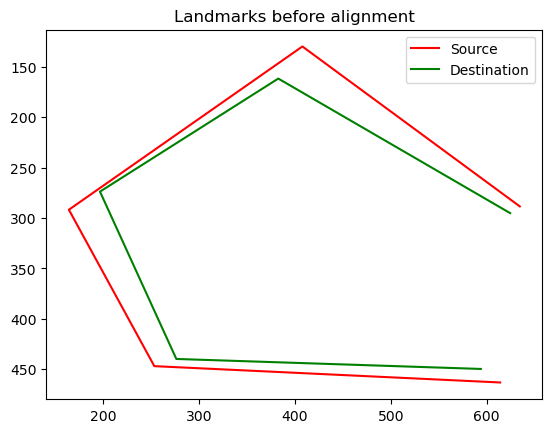

In [25]:
src_transform = matrix_transform(src, tform.params)

fig, ax = plt.subplots()
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [26]:
e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 4331.957084698943


### Exercise 16

We can now apply the transformation to the source image. Notice that we use the inverse transform due to the inverse mapping in the image resampling:

``` python
warped = warp(src_img, tform.inverse)
```

Show the warped image and also try to blend the warped image destination image like in exercise 11. What do you observe?

In [27]:
warped = warp(src_img, tform.inverse)
show_comparison(src_img, warped, "Warped image")

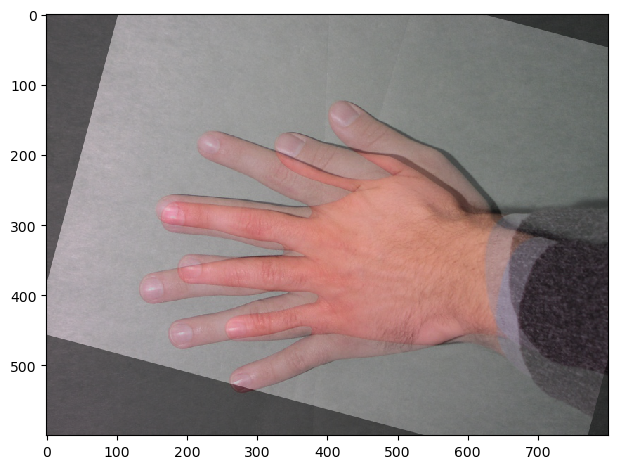

In [28]:
blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(warped)
io.imshow(blend)
io.show()